In [1]:
import cv2
import string
import random
import numpy as np
from captcha import ImageCaptcha
from captcha import random_color

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image = ImageCaptcha(width=64, height=64, font_sizes=(64, 64, 64))

In [4]:
az = string.ascii_lowercase
AZ = string.ascii_uppercase
nm = string.digits

In [7]:
all_selections = []

for i in range(len(az)):
    all_selections.append(az[i])

for i in range(len(AZ)):
    all_selections.append(AZ[i])

for i in range(len(nm)):
    all_selections.append(nm[i])

In [8]:
len(all_selections)

62

In [9]:
print(all_selections)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [52]:
color = random_color(10, 200, random.randint(220, 255))

In [53]:
all_data = []
all_lbls = []

for _ in range(5):
    idx  = random.randint(0, len(all_selections)-1)
    data = image.generate_image(all_selections[idx], color=color)
    all_lbls.append(all_selections[idx])
    all_data.append(data)

In [54]:
total_w = 0
for i in all_data:
    pix = np.array(i)
    h, w, _ = pix.shape
    total_w += w

In [55]:
canvas = np.ones((90, total_w + 20, 3)).astype(np.uint8) * 255

In [56]:
all_bbox = []

In [57]:
prev_w= 10
for i in all_data:
    pix = np.array(i)
    h, w, _ = pix.shape
    # print(pix.shape)
    # Get BBox's
    h1 = 10
    w1 = prev_w
    h2 = h
    w2 = w-4
    all_bbox.append([w1, h1, w2, h2])
    # Paint Canvas
    canvas[10:10+h, prev_w:prev_w+w, :] = pix
    prev_w += w

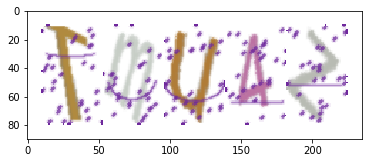

In [58]:
plt.imshow(canvas)
plt.show()

In [59]:
for i in range(len(all_bbox)):
    x, y, w, h = all_bbox[i]
    cv2.rectangle(canvas,(x,y),(x+w,y+h),(255,0,0), 1)

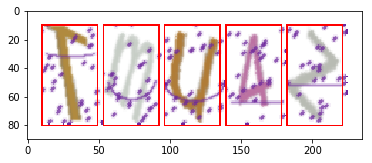

In [60]:
plt.imshow(canvas)
plt.show()

In [61]:
print all_lbls

['T', 'm', 'u', '4', 'z']


In [62]:
all_bbox

[[10, 10, 39, 70],
 [53, 10, 39, 70],
 [96, 10, 39, 70],
 [139, 10, 39, 70],
 [182, 10, 39, 70]]